In [1]:
pip install torch torchvision matplotlib


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [3]:
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 51.3MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.65MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 12.2MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.50MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



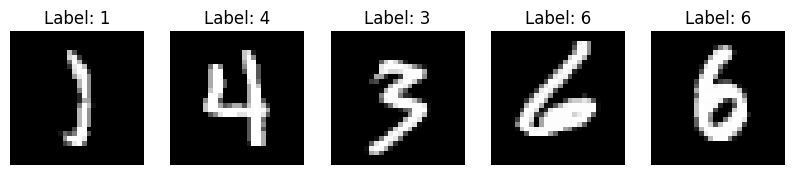

In [4]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i].squeeze(), cmap="gray")
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')
plt.show()


In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Input to first hidden layer
        self.fc2 = nn.Linear(128, 64)    # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(64, 10)     # Second hidden layer to output layer

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the 28x28 image into a single vector
        x = torch.relu(self.fc1(x))  # Apply ReLU activation after the first layer
        x = torch.relu(self.fc2(x))  # Apply ReLU activation after the second layer
        x = self.fc3(x)  # Output logits (raw scores)
        return x


In [6]:
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 5
for epoch in range(epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()  # Reset gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagate
        optimizer.step()  # Update weights

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")


Epoch 1/5, Loss: 0.4501717984676361
Epoch 2/5, Loss: 0.2278136909008026
Epoch 3/5, Loss: 0.019510561600327492
Epoch 4/5, Loss: 0.1738266795873642
Epoch 5/5, Loss: 0.024743784219026566


Epoch 1/5, Loss: 0.0431674288893327
Epoch 2/5, Loss: 0.03549595468993813
Epoch 3/5, Loss: 0.029642255437165213
Epoch 4/5, Loss: 0.024082842657872132
Epoch 5/5, Loss: 0.02165391210141517


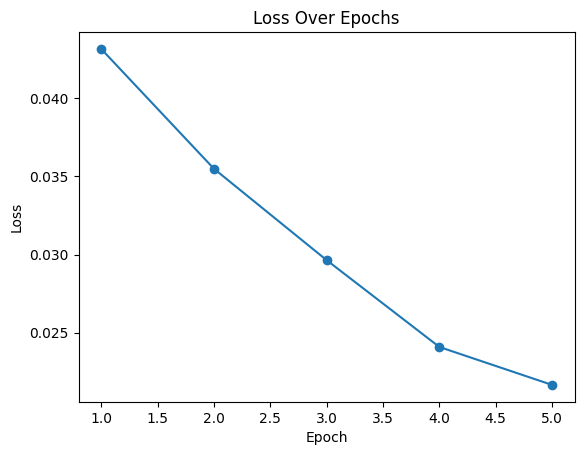

In [7]:
losses = []
for epoch in range(epochs):
    epoch_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    losses.append(epoch_loss / len(train_loader))
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / len(train_loader)}")

# Plot the loss
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


Epoch 1/5, Loss: 0.01696769739583091
Epoch 2/5, Loss: 0.017399803263604144
Epoch 3/5, Loss: 0.015581631742363267
Epoch 4/5, Loss: 0.012755298684842157
Epoch 5/5, Loss: 0.01018805091591861


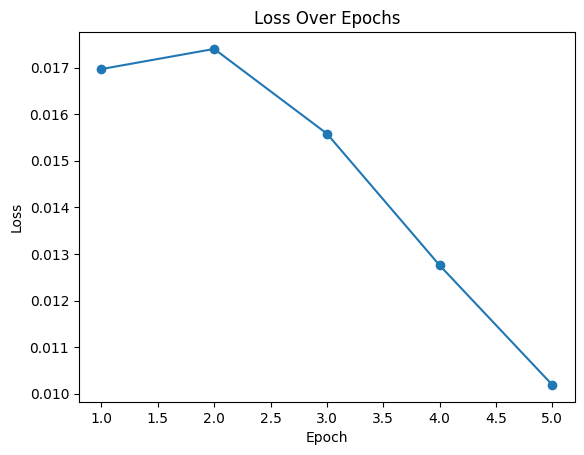

In [8]:
losses = []
for epoch in range(epochs):
    epoch_loss = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    losses.append(epoch_loss / len(train_loader))
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / len(train_loader)}")

# Plot the loss
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


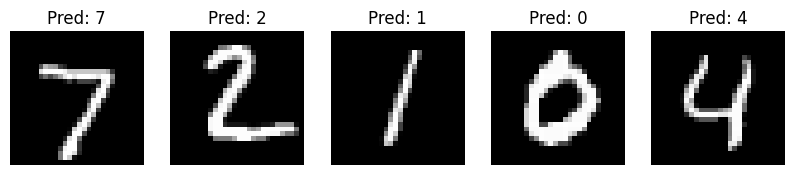

In [9]:
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

test_images, test_labels = next(iter(test_loader))
test_outputs = model(test_images)
_, predictions = torch.max(test_outputs, 1)

plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i].squeeze(), cmap="gray")
    plt.title(f"Pred: {predictions[i].item()}")
    plt.axis('off')
plt.show()
